# MBTI Personality Prediction

## Overview 

Many years ago I studied Psychology and I obtained the MA in Cognitive Science. Even though my life took a different turn after college, my passion for Psychology remained true. For this assignment, I was specifically searching for Psychology data sets on Kaggle that I could use to build a predictive model. I came across the data set matching Myers-Briggs Personality Type with social media posts for 8600 people and I found it interesting. If we can predict personality type based on written texts, it can lead to all sorts of interesting applications – from easy diagnostics to optimizing interfaces of software to appeal to particular personality types. I decided to build a predicting model based on this data set.

### Myers-Briggs Type Indicator introduction

Before we jump into the specifics of my machine learning model, I'd like to briefly introduce the Meyrs–Briggs Indicator (MBTI) personality test. MBTI was developed in the 1940s by American Psychologists – Katherine Cook Briggs and Isabel Briggs Meyrs. The test identifies 16 personality types which are grouped by four pairs of opposite preferences: 
* extraversion (E) or introversion (I),
* sensing (S) or intuition (N),
* thinking (T) or feeling (F),
* and judging (J) or perceiving (P).

Combinations of one letter from each pair results in 16 unique four-letter combinations:

**Analysts**
* INTJ: Architect
* INTP: Logician
* ENTJ: Commander
* ENTP: Debater

**Diplomats**
* INFJ: Advocate
* INFP: Mediator
* ENFJ: Protagonist
* ENFP: Campaigner
  
**Sentinels**
* ISTJ: Logistician
* ISFJ: Defender
* ESTJ: Executive
* ESFJ: Consul
  
**Explorers**
* ISTP: Virtuoso
* ISFP: Adventurer
* ESTP: Entrepreneur
* ESFP: Entertainer

Subjects of the MBTI evaluation answer ranking questions such as "At a party do you: a. Interact with many, including strangers, b. Interact with a few known to you". Answers all these questions directly classify subjects into one of the types represented by the opposing pairs of types. Once all four types are established, the four letter meta type becomes evident and it's matched with a predetermined personality description.

### Myers-Briggs Type Indicator critique

It's worth noting that while MBTI test continues to be highly popular in the fields of Psychological diagnostics and Psychology of Work and Human Resources, it is widely criticized as a signal of preferences rather than pure indicator of the personality type. One could say that evaluated people choose the vision of themselves that they idealized rather than what is the true expression of their personality. 

### Machine learning research plan

At a high level my plan is as follows:
1. EAD. After loading the data set I'm going to thoroughly evaluate it. I'll pay a lot of attention to how balanced the data set is (number of observations per type).
2. Data processing. I assume that I'll have to process the data to clean it up and prepare it for training of a machine learning model.
3. Vectorization. The text data will have to be vectoried to be used by my supervised model.
4. Model training. Based on the aforementioned analysis I'll decide which supervised model, or models, should I use.
5. Model tuning. I'll analyze the performance of the model and try to tune it.
6. Inference. I'm going to write a little inference system and test the final model on an additional data set – my own social media posts.

## Reference
* The Myers-Briggs personality type dataset. Kaggle. Retrieved October 20, 2025, https://www.kaggle.com/datasets/datasnaek/mbti-type
* Myers–Briggs Type Indicator. (2025, October 23). In Wikipedia. Retrieved October 25, 2025, from https://en.wikipedia.org/wiki/Myers%E2%80%93Briggs_Type_Indicator

## Data Loading

In the first step I'm loading the standard libraries and I'm loading the dataset into a panda dataframe. Subsquently I'm investigating the basic shape of the data.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up our display
pd.set_option('display.max_colwidth', 200)

# Load the dataset
df = pd.read_csv('mbti_1.csv')

# --- Initial Inspection ---
print("--- Data Shape ---")
print(df.shape)

print("\n--- Data Info ---")
print(df.info())

print("\n--- First 5 Rows ---")
display(df.head())

--- Data Shape ---
(8675, 2)

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
None

--- First 5 Rows ---


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not t...
1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to ...
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend c..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear..."
4,ENTJ,'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached...


## Exploratory Data Analysis

As I mentioned in the overview – MBTI specifies 16 personality types formed from one item in each of 4 pairs of values (e.g. extrovert vs. introvert). In order to build a machine learning model, I have to investigate the distribution of each type in the dataset.

1. First, I'm going to investigate how many examples do we have for each MBTI type. As you can see below – the data has an extremely unequal distribition. There are a lot of samples with types INFP, INFJ, INTJ..., but only a few with ESTJ, ESFJ, ESFP. This data will make it difficult to train a model on. If left like that it would lead me to a very weak model. I have to attempt fixing it.

| type | count |
|:---|:---|
| INFP | 1832 |
| INFJ | 1470 |
| INTP | 1304 |
| INTJ | 1091 |
| ENTP | 685 |
| ENFP | 675 |
| ISTP | 337 |
| ISFP | 271 |
| ENTJ | 231 |
| ISTJ | 205 |
| ENFJ | 190 |
| ISFJ | 166 |
| ESTP | 89 |
| ESFP | 48 |
| ESFJ | 42 |
| ESTJ | 39 |

   
| type | posts |
|:---|:---|
| **INFJ** | 'http://www.youtube.com/watch?v=qsXHcwe3krw\|\|\|http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg\|\|\|enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not t... |
| **ENTP** | 'I'm finding the lack of me in these posts very alarming.\|\|\|Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to ... |
| **INTP** | 'Good one \_\_\_\_\_ https://www.youtube.com/watch?v=fHiGbolFFGw\|\|\|Of course, to which I say I know; that's my blessing and my curse.\|\|\|Does being absolutely positive that you and your best friend c... |
| **INTJ** | 'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...\|\|\|Dear... |
| **ENTJ** | 'You're fired.\|\|\|That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached... |

2. To fix this imbalance in data, I'm going to investigate how many observations do we have per each lower level type (e.g. Extravert). Since these lower level types are used across all the meta types we may end up with a significantly more balanced data set suitable for training. This approach will essentially bundles types. For example, the rare 'ESTJ' data is not going to be lost. I'll use it to help train the 'Extravert', 'Sensing', 'Thinking', and 'Judging' models.

The results are as follows:

| Trait | Category (1) | Count (1) | Category (0) | Count (0) |
| :--- | :--- | :---: | :--- | :---: |
| **I vs. E** | Introvert | 6676 | Extravert | 1999 |
| **N vs. S** | Intuitive | 7478 | Sensing | 1197 |
| **T vs. F** | Thinking | 4694 | Feeling | 3981 |
| **J vs. P** | Judging | 5241 | Perceiving | 3434 |

While these binary pairs are still not uniform in the number of observations(especially true for Introvert vs. Extravert and Intuitive vs. Sensing) the delta is much smaller. I assume that by choosing the right model with the right configuration, I'll be able to build a relatively well performing predictive model. 

You can see the data divided into these pairs in this table: 
| type | posts | is\_Introvert | is\_Intuitive | is\_Thinking | is\_Judging |
|:---|:---|:---:|:---:|:---:|:---:|
| **INFJ** | 'http://www.youtube.com/watch?v=qsXHcwe3krw\|\|\|http://41.media.tumblr.com/tumblr\_lfouy03PMA1qa1rooo1\_500.jpg\|\|\|enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not t... | 1 | 1 | 0 | 1 |
| **ENTP** | 'I'm finding the lack of me in these posts very alarming.\|\|\|Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to ... | 0 | 1 | 1 | 0 |
| **INTP** | 'Good one \_\_\_\_\_ https://www.youtube.com/watch?v=fHiGbolFFGw\|\|\|Of course, to which I say I know; that's my blessing and my curse.\|\|\|Does being absolutely positive that you and your best friend c... | 1 | 1 | 1 | 0 |
| **INTJ** | 'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...\|\|\|Dear... | 1 | 1 | 1 | 1 |
| **ENTJ** | 'You're fired.\|\|\|That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached... | 0 | 1 | 1 | 1 |

Based on the data sample I can also see that this text data will have to be cleaned up and this is going to be my next step.

--- Original Type Distribution ---
type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64


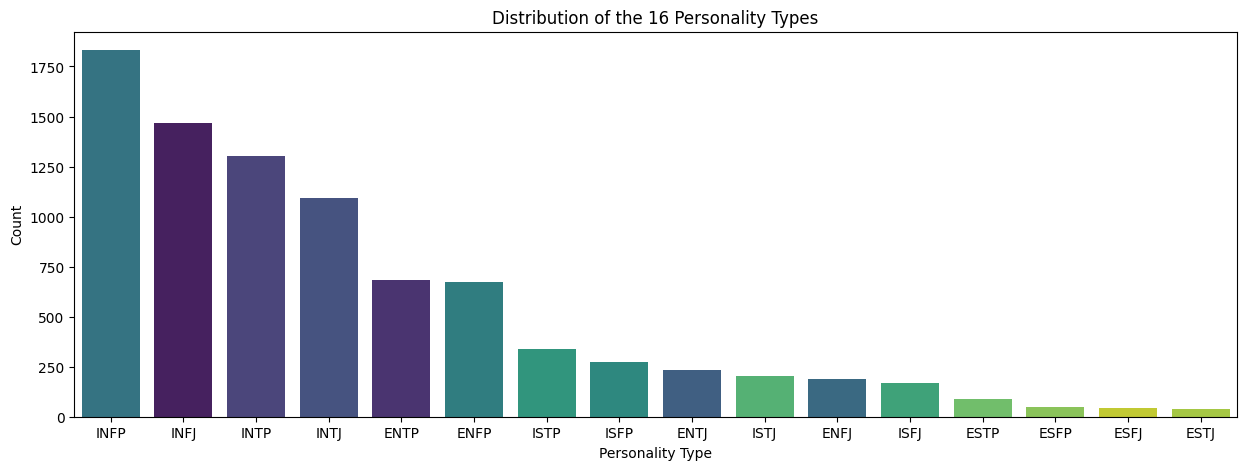

,type,posts,is_Introvert,is_Intuitive,is_Thinking,is_Judging
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not t...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to ...,0,1,1,0
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend c...",1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear...",1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached...,0,1,1,1


Summary of Binary Trait Distribution


,Count (1),Count (0)
Introvert vs. Extravert,6676,1999
Intuitive vs. Sensing,7478,1197
Thinking vs. Feeling,3981,4694
Judging vs. Perceiving,3434,5241


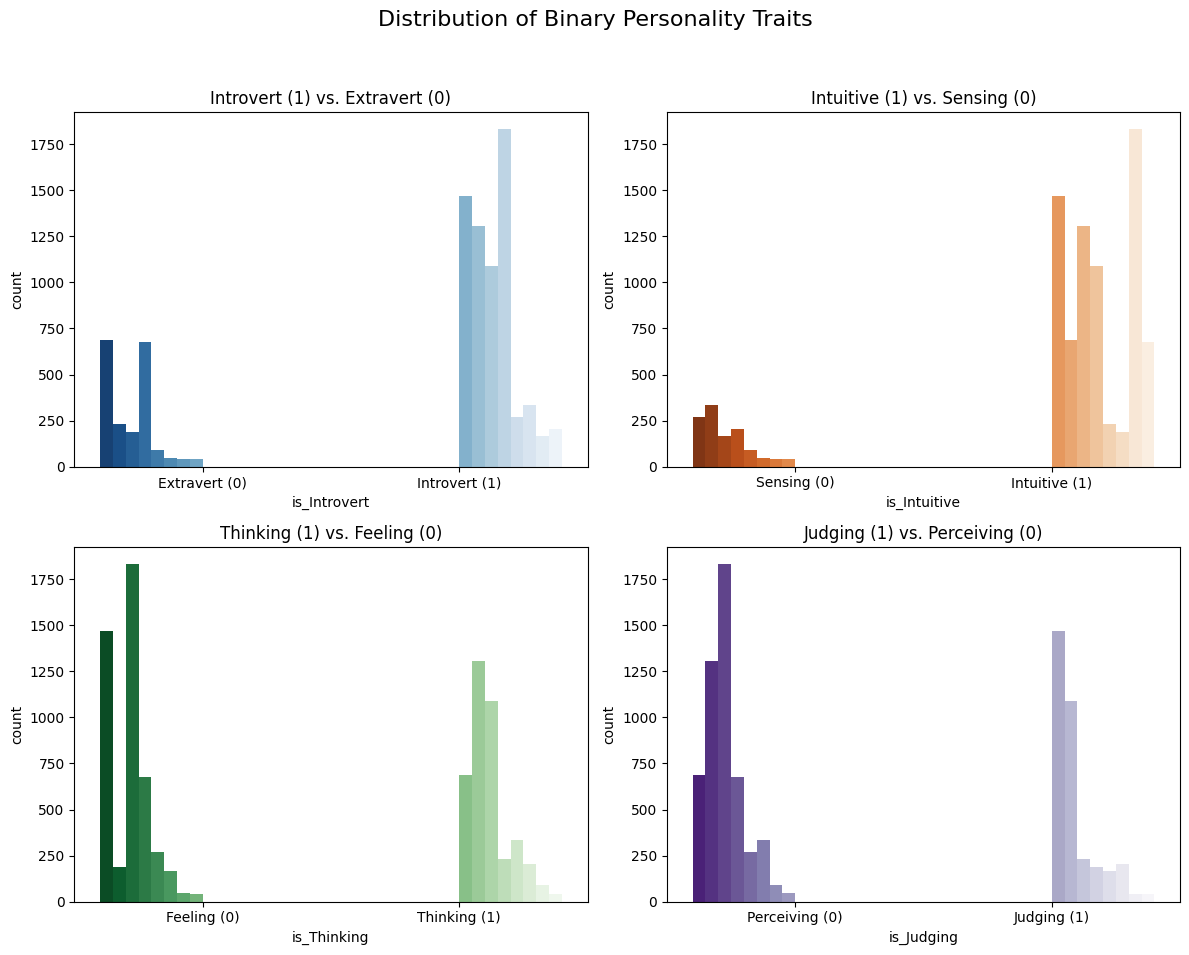

In [102]:
# Distribution of Original 16 Types

# Counting number of observations per meta type
print("MBTI Type Distribution")
type_counts = df['type'].value_counts()
print(type_counts)

# Plotting number of observations per MBTI type
plt.figure(figsize=(15, 5))
sns.countplot(
    data=df, 
    x='type', 
    order=type_counts.index,
    palette='viridis',
    hue='type',     
    legend=False
)
plt.title('Distribution of the 16 Personality Types')
plt.xlabel('Personality Type')
plt.ylabel('Count')
plt.show()

# Feature Engineering: I'm going to create 4 binary sub-types.

# I (Introvert) vs. E (Extravert)
df['is_Introvert'] = df['type'].apply(lambda x: 1 if x[0] == 'I' else 0)

# N (Intuitive) vs. S (Sensing)
df['is_Intuitive'] = df['type'].apply(lambda x: 1 if x[1] == 'N' else 0)

# T (Thinking) vs. F (Feeling)
df['is_Thinking'] = df['type'].apply(lambda x: 1 if x[2] == 'T' else 0)

# J (Judging) vs. P (Perceiving)
df['is_Judging'] = df['type'].apply(lambda x: 1 if x[3] == 'J' else 0)

# investigating how the data looks like now
display(df.head())

# Counting columns for investigation of the balance of data
trait_counts = {
    'Introvert vs. Extravert': df['is_Introvert'].value_counts(),
    'Intuitive vs. Sensing': df['is_Intuitive'].value_counts(),
    'Thinking vs. Feeling': df['is_Thinking'].value_counts(),
    'Judging vs. Perceiving': df['is_Judging'].value_counts()
}
summary_df = pd.DataFrame(trait_counts).T

summary_df = summary_df.rename(columns={
    1: 'Count (1)', # e.g., Introvert, Intuitive, etc.
    0: 'Count (0)'  # e.g., Extravert, Sensing, etc.
})

# reordering to match each type name
summary_df = summary_df[['Count (1)', 'Count (0)']]

# displaying count of subtypes
print("Summary of Binary Trait Distribution")
display(summary_df)

# plotting subtypes
import warnings
warnings.filterwarnings('ignore', category=UserWarning) # Ignoring some sns warnings for plots that are not material

# Set up the plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribution of Binary Personality Traits', fontsize=16)

# Plot I vs. E
sns.countplot(
    ax=axes[0, 0], 
    data=df, 
    x='is_Introvert', 
    palette='Blues_r', 
    hue='type',     
    legend=False)
axes[0, 0].set_title('Introvert (1) vs. Extravert (0)')
axes[0, 0].set_xticklabels(['Extravert (0)', 'Introvert (1)'])

# Plot N vs. S
sns.countplot(
    ax=axes[0, 1], 
    data=df, 
    x='is_Intuitive', 
    palette='Oranges_r',
    hue='type',     
    legend=False
)
axes[0, 1].set_title('Intuitive (1) vs. Sensing (0)')
axes[0, 1].set_xticklabels(['Sensing (0)', 'Intuitive (1)'])

# Plot T vs. F
sns.countplot(
    ax=axes[1, 0], 
    data=df, 
    x='is_Thinking', 
    palette='Greens_r',
    hue='type',     
    legend=False    
)
axes[1, 0].set_title('Thinking (1) vs. Feeling (0)')
axes[1, 0].set_xticklabels(['Feeling (0)', 'Thinking (1)'])

# Plot J vs. P
sns.countplot(
    ax=axes[1, 1], 
    data=df, 
    x='is_Judging', 
    palette='Purples_r',
    hue='type',     
    legend=False   
)
axes[1, 1].set_title('Judging (1) vs. Perceiving (0)')
axes[1, 1].set_xticklabels(['Perceiving (0)', 'Judging (1)'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Text Preprocessing

As mentioned above, looking at the text data in samples I can clearly see that I'll have to clean up each observation. For example (one of the observations: *"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not t..."* urls are not going to help me predict the personality type, so I have to remove them.

My full data clean-up plan is as follows:
1. Remove URLs: Get rid of all http... links.
2. Remove Non-Alphanumerics: Remove punctuation, numbers, and the ||| symbol.
3. Convert to Lowercase: Standardize the text (e.g., 'Love' and 'love' become the same word).
4. Remove Stop Words: Remove common English words that don't add meaning (like 'the', 'a', 'is', 'in').

Those steps should prepare the text for further operations (vectorization) and model training.

In [130]:
import re

# Light pre processing based on regexp patterns
def preprocess_text_lite(text):
    # 1. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # 2. Remove the '|||' separators
    text = text.replace('|||', ' ')
    
    # 3. Remove all non-alphabetic characters (punctuation, numbers, etc.)
    # and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    
    # 4. Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Adding new column with cleaned up text – 'posts_clean'
df['posts_clean'] = df['posts'].apply(preprocess_text_lite)


# Checking results of pre-processing
print("\n Before preprocessing")
display(df[['posts']].head())
print("\n After")
display(df[['posts_clean']].head())


 Before preprocessing


,posts
0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not t...
1,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to ...
2,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend c..."
3,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear..."
4,'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached...



 After


,posts_clean
0,and intj moments sportscenter not top ten plays pranks what has been the most lifechanging experience in your life on repeat for most of today may the perc experience immerse you the last thing my...
1,im finding the lack of me in these posts very alarming sex can be boring if its in the same position often for example me and my girlfriend are currently in an environment where we have to creativ...
2,good one course to which i say i know thats my blessing and my curse does being absolutely positive that you and your best friend could be an amazing couple count if so than yes or its more i coul...
3,dear intp i enjoyed our conversation the other day esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created dear entj sub l...
4,youre fired thats another silly misconception that approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to nobody wants to be approached with bs b...


# Word clouds visualization

Since the data is now cleaned, I decided to investigate it further and display word clouds per each subtype. This will help me see if I have to remove certain words before vectorization.

Reference
Davis, K. (2021, January 15). WordCloud style guide. Medium. https://kristendavis27.medium.com/wordcloud-style-guide-2f348a03a7f8

In [59]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.


Feeling
Word cloud for Feeling


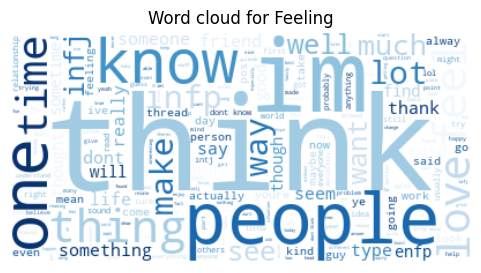

Thinking
Word cloud for Thinking


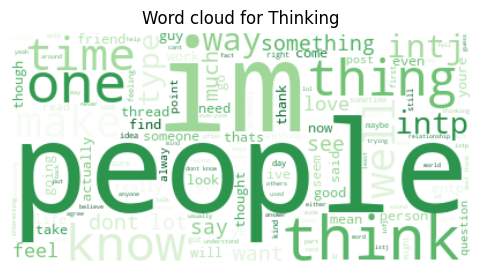

Introvert
Word cloud for Introvert


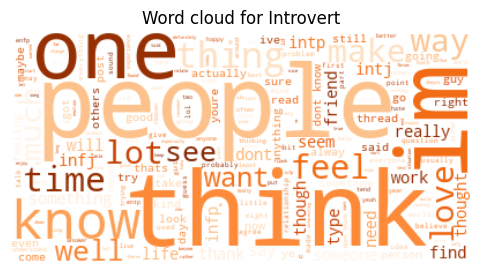

Extravert
Word cloud for Extravert


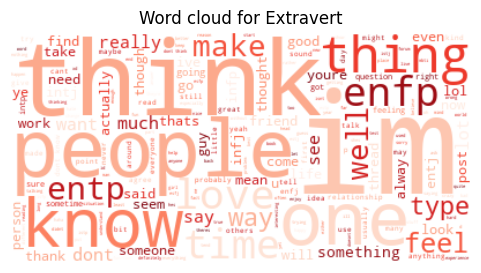

Intuitive
Word cloud for Intuitive


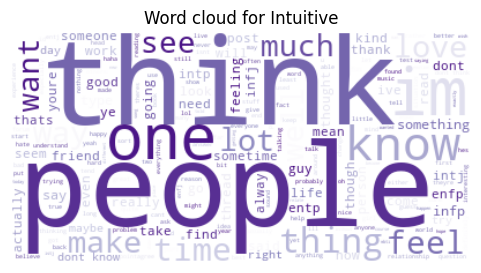

Sensing
Word cloud for Sensing


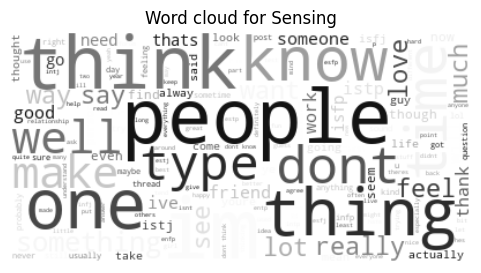

Perceiving
Word cloud for Perceiving


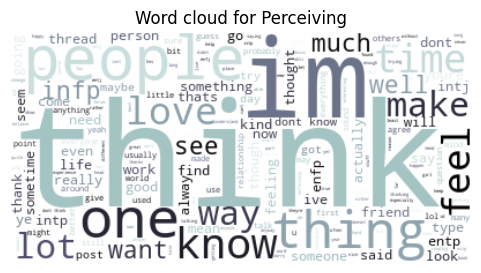

Judging
Word cloud for Judging


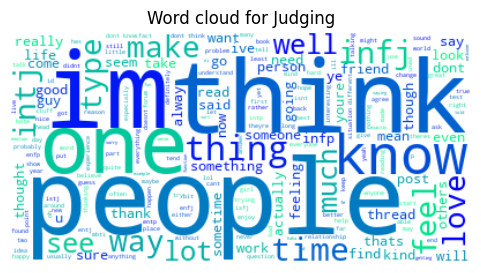

In [110]:
from wordcloud import WordCloud

# Generate one string version of all text to pass to word clouds

# Filter our dataframe for all 'Feeling'
feeling_text = df[df['is_Thinking'] == 0]['posts_clean']
# Join them all into one giant string
feeling_corpus = " ".join(feeling_text)

# Repeat the operation above for all other types
thinking_text = df[df['is_Thinking'] == 1]['posts_clean']
thinking_corpus = " ".join(thinking_text)

extravert_text = df[df['is_Introvert'] == 0]['posts_clean']
extravert_corpus = " ".join(extravert_text)

introvert_text = df[df['is_Introvert'] == 1]['posts_clean']
introvert_corpus = " ".join(introvert_text)

sensing_text = df[df['is_Intuitive'] == 0]['posts_clean']
sensing_corpus = " ".join(sensing_text)

intuitive_text = df[df['is_Intuitive'] == 1]['posts_clean']
intuitive_corpus = " ".join(intuitive_text)

perceiving_text = df[df['is_Judging'] == 0]['posts_clean']
perceiving_corpus = " ".join(perceiving_text)

judging_text = df[df['is_Judging'] == 1]['posts_clean']
judging_corpus = " ".join(judging_text)


# Generate plots for each MBIT type in a loop to save code repetition

wc_colors = ["Blues", "Greens", "Oranges", "Reds", "Purples", "Greys", "bone", "winter"]
mbti_types = {
    "Feeling": feeling_corpus,
    "Thinking": thinking_corpus,
    "Introvert": introvert_corpus,
    "Extravert": extravert_corpus,
    "Intuitive": intuitive_corpus,
    "Sensing": sensing_corpus,
    "Perceiving": perceiving_corpus,
    "Judging": judging_corpus
}

for i, key in enumerate(mbti_types):
    print(key)
    title = f"Word cloud for {key}"
    print(f"Word cloud for {key}")
    wc_feel = WordCloud(width=400, height=200, background_color='white', colormap=wc_colors[i]).generate(mbti_types[key])
    plt.figure(figsize=(6, 3))
    plt.imshow(wc_feel, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Vectorize text (TF-IDF) & splitting data into train and test

As the next step I'm going to vectorize the text using TF-IDF. TF-IDF is a great method for vectorizing words in documents and preparing them for model training (many models can't consume pure text). It takes into account not only the count of words in a given text but also checks the frequency of words between texts penalizing words that are very common. Using TF-IDF we should be able to capture popularity of unique words for our MBTI categories.

It's also worth noting that my word clouds showed quite a lot of repetetive words acorss all types (e.g. people, IM, know, make, think). Those are not going to be helpful in predicting the personality type, so I'll have to remove them (via custom stop words list) before vectorizing the text.

Once the text is vectorized I'm going to split it into 4 training and testing data sets. Why 4? We're going to need separate sets for predicting each MBTI category:
* **IE.** Introvert – extrovert 
* **NS.** Intuitive – sensing
* **TF.** Thinking – feeling
* **JP.** Judging – perceiving

In order to create a balanced (representative) test and train sets for each category – I can't just randomly pick data from the data set, since this would skew the proportion of our originally imbalanced data. To avoid this issue I'm goign to use "stratify" to keep the proportion of the original data set in each of train and tests sets.

### Reference 
Le, V. (2019, August 20). Problem solving with ML: Automatic document classification. Google Cloud Blog. https://cloud.google.com/blog/products/ai-machine-learning/problem-solving-with-ml-automatic-document-classification

Understanding TF-IDF for machine learning. (2021, October 6). Capital One. https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/

tf–idf. (n.d.). In Wikipedia. Retrieved October 22, 2025, from https://en.wikipedia.org/wiki/Tf%E2%80%93idf


In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text

# X represents previously cleaned up text // input, features
X = df['posts_clean']

# y_IE, y_NS, etc., are the 4 targets representing 8 variables (since 4 MBTI categories are forming opposing pairs)
y_IE = df['is_Introvert']
y_NS = df['is_Intuitive']
y_TF = df['is_Thinking']
y_JP = df['is_Judging']

print(f"Shape of X: {X.shape}")
print(f"Shape of y_IE: {y_IE.shape}")

# removing words repeated across all types (identified with word clouds)
custom_stop_words = ["im", "think", "know", "make", "thing", "something"]
stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop_words)

# Init TF-IDF
vectorizer = TfidfVectorizer(
    max_features=5000,  # limiting to 500 words for performance reasons
    ngram_range=(1, 2),  # Include bigrams (e.g., "very good") as well as single words
    stop_words=list(stop_words),
    max_df=0.98 # ignoring words in 95% docs
)

# Fit X into tfidf vectorizer to transform all the text
X_tfidf = vectorizer.fit_transform(X)

print(f"Shape of our new X_tfidf matrix: {X_tfidf.shape}")

# Train / test splits
X_train_IE, X_test_IE, y_train_IE, y_test_IE = train_test_split(
    X_tfidf, y_IE, test_size=0.2, random_state=42, stratify=y_IE
)

X_train_NS, X_test_NS, y_train_NS, y_test_NS = train_test_split(
    X_tfidf, y_NS, test_size=0.2, random_state=42, stratify=y_NS
)

X_train_TF, X_test_TF, y_train_TF, y_test_TF = train_test_split(
    X_tfidf, y_TF, test_size=0.2, random_state=42, stratify=y_TF
)

X_train_JP, X_test_JP, y_train_JP, y_test_JP = train_test_split(
    X_tfidf, y_JP, test_size=0.2, random_state=42, stratify=y_JP
)

print(f"Example: I/E Train set shape: {X_train_IE.shape}")
print(f"Example: I/E Test set shape: {X_test_IE.shape}")

print(f"Example: J/P Train set shape: {X_train_JP.shape}")
print(f"Example: J/P Test set shape: {X_test_JP.shape}")

Shape of X: (8675,)
Shape of y_IE: (8675,)
Shape of our new X_tfidf matrix: (8675, 5000)
Example: I/E Train set shape: (6940, 5000)
Example: I/E Test set shape: (1735, 5000)
Example: J/P Train set shape: (6940, 5000)
Example: J/P Test set shape: (1735, 5000)


# Training Models

Based on the problem of classifying data to a known number of categories I decided to start my model training with a simple Logistic regression (using sklearn.linear_model). For each of 4 MBTI pairs of personality types, I'm going to train a Logistic Regression. Each model will be evaluated based on performance metrics and I'm going to generate confusion matrix.

Taking that my data is still not balanced I'm going to use class_weight='balanced' parameter, which according to scikit learn documentation should attempt automatically balancing the data.

### Reference

Scikit-learn developers. (n.d.). sklearn.linear_model.LogisticRegression. scikit-learn. Retrieved October 25, 2025, from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [113]:
# Libraries for all models 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


--- I/E Model Performance on Test Set ---
{'Extrovert (0)': {'precision': 0.6381578947368421, 'recall': 0.7275, 'f1-score': 0.6799065420560748, 'support': 400}, 'Introvert (1)': {'precision': 0.9147771696637998, 'recall': 0.8764044943820225, 'f1-score': 0.8951798010711555, 'support': 1335}, 'accuracy': 0.8420749279538905, 'macro avg': {'precision': 0.7764675322003209, 'recall': 0.8019522471910112, 'f1-score': 0.7875431715636152, 'support': 1735}, 'weighted avg': {'precision': 0.8510032734270373, 'recall': 0.8420749279538905, 'f1-score': 0.8455490785316556, 'support': 1735}}
--- Confusion Matrix ---


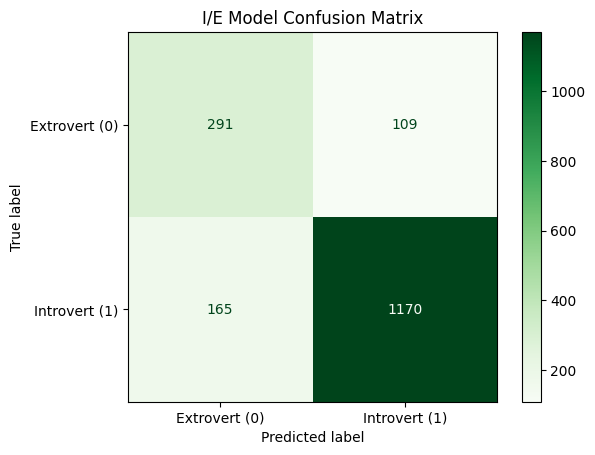

In [119]:
# Introvert (I) vs. Extrovert (E) model 
model_IE = LogisticRegression(
    class_weight='balanced', 
    random_state=42, 
    max_iter=1000
)

# Train
model_IE.fit(X_train_IE, y_train_IE)

# Make prediction
y_pred_IE = model_IE.predict(X_test_IE)

# Evaluation
print("\n--- I/E Model Performance on Test Set ---")

# Print the classification report
report_IE = classification_report(y_test_IE, y_pred_IE, target_names=['Extrovert (0)', 'Introvert (1)'], output_dict=True)
print(report_IE)

# Confusion matrix
cm_IE = confusion_matrix(y_test_IE, y_pred_IE)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_IE, 
    display_labels=['Extrovert (0)', 'Introvert (1)']
)

print("--- Confusion Matrix ---")
disp.plot(cmap='Greens')
plt.title('I/E Model Confusion Matrix')
plt.show()


--- N/S Model Performance on Test Set ---
{'Sensing (0)': {'precision': 0.5582089552238806, 'recall': 0.7824267782426778, 'f1-score': 0.6515679442508711, 'support': 239}, 'Intuitive (1)': {'precision': 0.9628571428571429, 'recall': 0.9010695187165776, 'f1-score': 0.930939226519337, 'support': 1496}, 'accuracy': 0.8847262247838616, 'macro avg': {'precision': 0.7605330490405118, 'recall': 0.8417481484796276, 'f1-score': 0.791253585385104, 'support': 1735}, 'weighted avg': {'precision': 0.9071159804108319, 'recall': 0.8847262247838616, 'f1-score': 0.892455228558436, 'support': 1735}}
--- Confusion Matrix ---


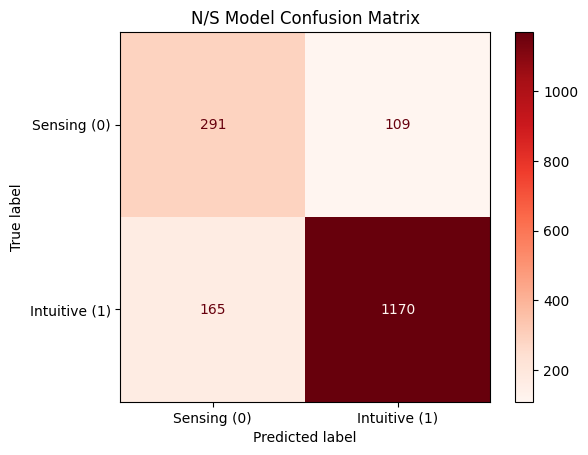

In [120]:
# Intuitive (N) vs. Sensing (S) model 
model_NS = LogisticRegression(
    class_weight='balanced', 
    random_state=42, 
    max_iter=1000
)

# Train
model_NS.fit(X_train_NS, y_train_NS)

# Make prediction
y_pred_NS = model_NS.predict(X_test_NS)

# Evaluation
print("\n--- N/S Model Performance on Test Set ---")

# Print the classification report
report_NS = classification_report(y_test_NS, y_pred_NS, target_names=['Sensing (0)', 'Intuitive (1)'], output_dict=True)
print(report_NS)

# Confusion matrix
cm_NS = confusion_matrix(y_test_NS, y_pred_NS)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_IE, 
    display_labels=['Sensing (0)', 'Intuitive (1)']
)

print("--- Confusion Matrix ---")
disp.plot(cmap='Reds')
plt.title('N/S Model Confusion Matrix')
plt.show()


--- T/F Model Performance on Test Set ---
{'Feeling (0)': {'precision': 0.8808463251670379, 'recall': 0.8423855165069223, 'f1-score': 0.8611867174741428, 'support': 939}, 'Thinking (1)': {'precision': 0.8231780167264038, 'recall': 0.8655778894472361, 'f1-score': 0.8438456827924065, 'support': 796}, 'accuracy': 0.8530259365994236, 'macro avg': {'precision': 0.8520121709467208, 'recall': 0.8539817029770792, 'f1-score': 0.8525162001332747, 'support': 1735}, 'weighted avg': {'precision': 0.854388703542401, 'recall': 0.8530259365994236, 'f1-score': 0.8532308306691503, 'support': 1735}}
--- Confusion Matrix ---


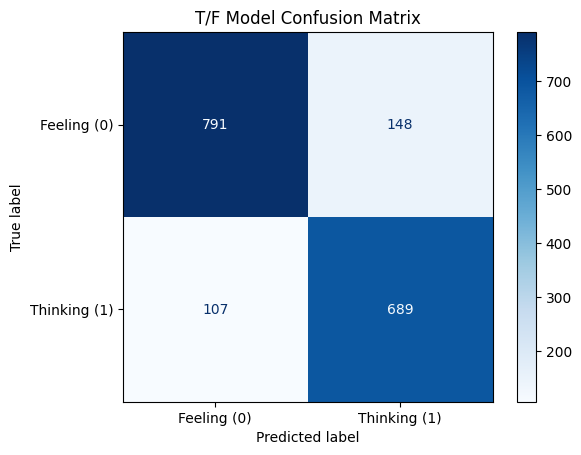

In [121]:
# Thinking (T) vs. Feeling (F) model 
model_TF = LogisticRegression(
    class_weight='balanced', 
    random_state=42, 
    max_iter=1000
)

# Train
model_TF.fit(X_train_TF, y_train_TF)

# Make prediction
y_pred_TF = model_TF.predict(X_test_TF)

# Evaluation
print("\n--- T/F Model Performance on Test Set ---")

# Print the classification report
report_TF = classification_report(y_test_TF, y_pred_TF, target_names=['Feeling (0)', 'Thinking (1)'], output_dict=True)
print(report_TF)

# Confusion matrix
cm_TF = confusion_matrix(y_test_TF, y_pred_TF)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_TF, 
    display_labels=['Feeling (0)', 'Thinking (1)']
)

print("--- Confusion Matrix ---")
disp.plot(cmap='Blues')
plt.title('T/F Model Confusion Matrix')
plt.show()


--- J/P Model Performance on Test Set ---
{'Perceiving (0)': {'precision': 0.8495145631067961, 'recall': 0.8349236641221374, 'f1-score': 0.8421559191530316, 'support': 1048}, 'Judging (1)': {'precision': 0.7546099290780142, 'recall': 0.7743813682678311, 'f1-score': 0.764367816091954, 'support': 687}, 'accuracy': 0.8109510086455332, 'macro avg': {'precision': 0.8020622460924052, 'recall': 0.8046525161949842, 'f1-score': 0.8032618676224927, 'support': 1735}, 'weighted avg': {'precision': 0.8119356100360334, 'recall': 0.8109510086455332, 'f1-score': 0.811354520419337, 'support': 1735}}
--- Confusion Matrix ---


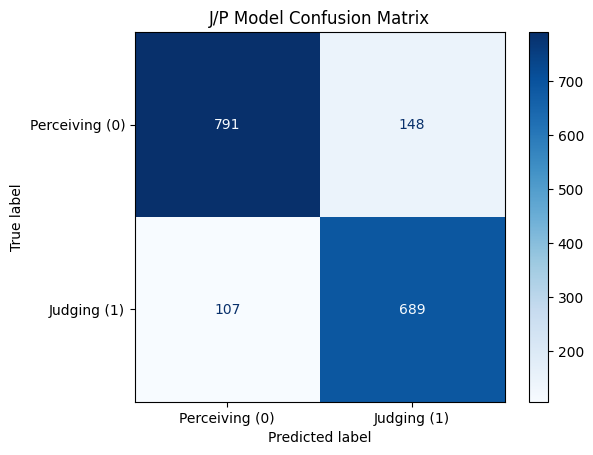

In [122]:
# Judging (J) vs. Perceiving (P) model 
model_JP = LogisticRegression(
    class_weight='balanced', 
    random_state=42, 
    max_iter=1000
)

# Train
model_JP.fit(X_train_JP, y_train_JP)

# Make prediction
y_pred_JP = model_JP.predict(X_test_JP)

# Evaluation
print("\n--- J/P Model Performance on Test Set ---")

# Print the classification report
report_JP = classification_report(y_test_JP, y_pred_JP, target_names=['Perceiving (0)', 'Judging (1)'], output_dict=True)
print(report_JP)

# Confusion matrix
cm_JP = confusion_matrix(y_test_JP, y_pred_JP)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_TF, 
    display_labels=['Perceiving (0)', 'Judging (1)']
)

print("--- Confusion Matrix ---")
disp.plot(cmap='Blues')
plt.title('J/P Model Confusion Matrix')
plt.show()

# Summary of model performance 

Logistic Regression performed relatively well across all four pairs of types out of the box. Judging vs. Perceiving had a little lower accuracy score than other pairs, but stull above 80% threshold, which taking the unbalanced data set, seems quite good. 

I decided to try to optimize the model by modifying its hyperparemeters, and see if I can get to even higher level of performance. 

| Trait Pair | Accuracy |
| :--- | :---: |
| **Thinking (T) vs. Feeling (F)** | 85.3% |
| **Introvert (I) vs. Extravert (E)**| 84.21% |
| **Intuitive (N) vs. Sensing (S)** | 88.47% |
| **Judging (J) vs. Perceiving (P)** | 81.1% |

In [125]:
from sklearn.metrics import classification_report

performance_data = []

# T/F metrics
performance_data.append({
    'Trait Pair': 'Thinking (T) vs. Feeling (F)',
    'Accuracy': f"{report_TF['accuracy']:.2%}",
    'F1-Score (Weighted)': f"{report_TF['weighted avg']['f1-score']:.4f}"
})

# --- 2. Get I/E Model Metrics ---
performance_data.append({
    'Trait Pair': 'Introvert (I) vs. Extravert (E)',
    'Accuracy': f"{report_IE['accuracy']:.2%}",
    'F1-Score (Weighted)': f"{report_IE['weighted avg']['f1-score']:.4f}"
})

# --- 3. Get N/S Model Metrics ---
performance_data.append({
    'Trait Pair': 'Intuitive (N) vs. Sensing (S)',
    'Accuracy': f"{report_NS['accuracy']:.2%}",
    'F1-Score (Weighted)': f"{report_NS['weighted avg']['f1-score']:.4f}"
})

# --- 4. Get J/P Model Metrics ---
performance_data.append({
    'Trait Pair': 'Judging (J) vs. Perceiving (P)',
    'Accuracy': f"{report_JP['accuracy']:.2%}",
    'F1-Score (Weighted)': f"{report_JP['weighted avg']['f1-score']:.4f}"
})

# --- 5. Create and Display the DataFrame ---
performance_df = pd.DataFrame(performance_data)

print("Logistic Regression Performance Summary")
display(performance_df)

Logistic Regression Performance Summary


,Trait Pair,Accuracy,F1-Score (Weighted)
0,Thinking (T) vs. Feeling (F),85.30%,0.8532
1,Introvert (I) vs. Extravert (E),84.21%,0.8455
2,Intuitive (N) vs. Sensing (S),88.47%,0.8925
3,Judging (J) vs. Perceiving (P),81.10%,0.8114


# Optimizing the Logistic Regression Performance

To optimize the performance, I'm going to use GridSearchCV that we covered in our classes. I decided to broaden my exploration and apart from regularization term C, I also tested the Class_weight. While "balanced" should perform better for most data sets, I'm not sure where is the threshold of imbalance that lets it improve the performace, so I concluded that it may be a good test. 

After running the GridSearchCV I got the following results:

| Trait Pair | Best C | Best class_weight | Accuracy | F1-Score (Weighted) |
| :--- | :---: | :---: | :---: | :---: |
| **Thinking (T) vs. Feeling (F)** | 5 | None | 84.67% | 0.8466 |
| **Introvert (I) vs. Extravert (E)**| 5 | balanced | 84.21% | 0.8455 |
| **Intuitive (N) vs. Sensing (S)** | 5 | balanced | 88.36% | 0.8915 |
| **Judging (J) vs. Perceiving (P)** | 1 | balanced | 81.15% | 0.818 |

Across all categories I observed a marginal improvement. Interestingly, "Thinking vs. Feeling" performes better without "class_weight"=balanced (the dataset is more balaned than others!). Parameter C has been tuned for "Judging vs. Perceiving" and "Intuitive vs. Sensing" to 0.5 which shows that for these sub-types the model benefitted from stronger regularization penalty.

In [126]:
from sklearn.model_selection import GridSearchCV

# Grid of hyperparams. 
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10],
    'class_weight': ['balanced', None],
    'max_iter': [1000, 2000, 5000]
}

# All my models prepped to be optimized
model_specs = [
    {
        'name': 'Thinking (T) vs. Feeling (F)',
        'X_train': X_train_TF, 'y_train': y_train_TF,
        'X_test': X_test_TF, 'y_test': y_test_TF
    },
    {
        'name': 'Introvert (I) vs. Extravert (E)',
        'X_train': X_train_IE, 'y_train': y_train_IE,
        'X_test': X_test_IE, 'y_test': y_test_IE
    },
    {
        'name': 'Intuitive (N) vs. Sensing (S)',
        'X_train': X_train_NS, 'y_train': y_train_NS,
        'X_test': X_test_NS, 'y_test': y_test_NS
    },
    {
        'name': 'Judging (J) vs. Perceiving (P)',
        'X_train': X_train_JP, 'y_train': y_train_JP,
        'X_test': X_test_JP, 'y_test': y_test_JP
    }
]


# Loop through models and run them through grid 
tuned_performance_data = []
best_estimators = {} # Dictionary to store our best models

for spec in model_specs:
    # Init Grid Search
    grid_search = GridSearchCV(
        LogisticRegression(random_state=42, max_iter=2000),
        param_grid,
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1
    )

    # Grid search per every training model
    grid_search.fit(spec['X_train'], spec['y_train'])

    # Store the best model
    best_estimators[spec['name']] = grid_search.best_estimator_
    
    # Evaluate the best model on the test set
    y_pred_tuned = grid_search.predict(spec['X_test'])
    report = classification_report(spec['y_test'], y_pred_tuned, output_dict=True)

    # Store the results
    tuned_performance_data.append({
        'Trait Pair': spec['name'],
        'Best C': grid_search.best_params_['C'],
        'Best class_weight': grid_search.best_params_['class_weight'],
        'Accuracy': f"{report['accuracy']:.2%}",
        'F1-Score (Weighted)': f"{report['weighted avg']['f1-score']:.4f}"
    })

# table with the perofmrnace
tuned_performance_df = pd.DataFrame(tuned_performance_data)

display(tuned_performance_df)

,Trait Pair,Best C,Best class_weight,Accuracy,F1-Score (Weighted)
0,Thinking (T) vs. Feeling (F),1.0,None,84.67%,0.8466
1,Introvert (I) vs. Extravert (E),1.0,balanced,84.21%,0.8455
2,Intuitive (N) vs. Sensing (S),0.5,balanced,88.36%,0.8915
3,Judging (J) vs. Perceiving (P),0.5,balanced,81.15%,0.8118


# Test performance with a different supervised model: SVM

While my Logistic Regression experiment with different settings led to some improvements, they were not very strong. For that reason I decided to give a try to a different model to see if I can get to a little bit of a better performance. I decided to test SVM with the same parameter grid that I used for running the search for the best Logistic Regression parameters. 

The results were very close to Logistic Regression. I achieved a better score for Intuitive vs. Sensing model, and a pretty much identical results (albeit slightly lower) for other models.

| Trait Pair | Best C | Best class_weight | Accuracy | F1-Score (Weighted) |
| :--- | :---: | :---: | :---: | :---: |
| **Thinking (T) vs. Feeling (F)** | 0.5 | None | 84.50% | 0.8449 |
| **Introvert (I) vs. Extravert (E)**| 0.5 | balanced | 84.09% | 0.8443 |
| **Intuitive (N) vs. Sensing (S)** | 1 | None | 89.74% | 0.8873 |
| **Judging (J) vs. Perceiving (P)** | 0.1 | balanced | 81.10% | 0.8112 |

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import time

# --- 2. Loop Through and Tune Each SVC Model ---
tuned_svc_performance_data = []
best_svc_estimators = {} # Dictionary to store our best SVC models

# This uses the same `model_specs` list from our previous tuning cell
for spec in model_specs:
    start_time = time.time()
    print(f"\n--- Tuning SVC for: {spec['name']} ---")

    # Initialize the Grid Search for the current model
    grid_search_svc = GridSearchCV(
        LinearSVC(random_state=42, dual=True),
        param_grid,
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1
    )

    # Run the search
    grid_search_svc.fit(spec['X_train'], spec['y_train'])

    # Store the best model itself
    best_svc_estimators[spec['name']] = grid_search_svc.best_estimator_
    
    # Evaluate the best model on the test set
    y_pred_svc_tuned = grid_search_svc.predict(spec['X_test'])
    report = classification_report(spec['y_test'], y_pred_svc_tuned, output_dict=True)

    # Store the results
    tuned_svc_performance_data.append({
        'Trait Pair': spec['name'],
        'Best C': grid_search_svc.best_params_['C'],
        'SVC Accuracy': f"{report['accuracy']:.2%}",
        'SVC F1-Score (Weighted)': f"{report['weighted avg']['f1-score']:.4f}"
    })
    
    end_time = time.time()
    print(f"Best Params: {grid_search_svc.best_params_}")
    print(f"Completed in {end_time - start_time:.2f} seconds.")

# --- 3. Create the Final, Ultimate Comparison Table ---
tuned_svc_summary_df = pd.DataFrame(tuned_svc_performance_data)

# Merge with your tuned LR results
final_tuned_comparison_df = pd.merge(
    tuned_performance_df[['Trait Pair', 'Accuracy', 'F1-Score (Weighted)']], 
    tuned_svc_summary_df[['Trait Pair', 'SVC Accuracy', 'SVC F1-Score (Weighted)']], 
    on='Trait Pair'
).rename(columns={'Accuracy': 'LR Accuracy', 'F1-Score (Weighted)': 'LR F1-Score (Weighted)'})


print("--- Final Comparison: Tuned LR vs. Tuned SVC ---")
display(final_tuned_comparison_df)



--- Tuning SVC for: Thinking (T) vs. Feeling (F) ---
Best Params: {'C': 0.1, 'class_weight': None, 'max_iter': 1000}
Completed in 8.70 seconds.

--- Tuning SVC for: Introvert (I) vs. Extravert (E) ---
Best Params: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000}
Completed in 10.00 seconds.

--- Tuning SVC for: Intuitive (N) vs. Sensing (S) ---
Best Params: {'C': 1, 'class_weight': None, 'max_iter': 1000}
Completed in 7.53 seconds.

--- Tuning SVC for: Judging (J) vs. Perceiving (P) ---
Best Params: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000}
Completed in 9.11 seconds.
--- Final Comparison: Tuned LR vs. Tuned SVC ---


,Trait Pair,LR Accuracy,LR F1-Score (Weighted),SVC Accuracy,SVC F1-Score (Weighted)
0,Thinking (T) vs. Feeling (F),84.67%,0.8466,84.50%,0.8449
1,Introvert (I) vs. Extravert (E),84.21%,0.8455,84.09%,0.8443
2,Intuitive (N) vs. Sensing (S),88.36%,0.8915,89.74%,0.8873
3,Judging (J) vs. Perceiving (P),81.15%,0.8118,81.10%,0.8112


# Ideal model and Discussion

Finally, I compared side by side tuned performance of Logistic Regression and SVM (SVC). Differenes are small, but taking the near 1pp difference in Intuitive vs. Sensing I'd give a small edge to SVC performance.

Reflecting on the near 1pp differenfe in Intuitive vs. Sensing I concluded that it makes sense that SVM performed better. The data for this pair of types is the most imbalance (very small data set for sensing). SVM ignores this imbalance and focuses on finding the widest margin line through the data. This approach benefits predictions.

Taking this conclusion, I decided that SVM is the best model for my application and I'll use it for inference. 

| Trait Pair | LR Accuracy | SVC Accuracy | LR F1-Score | SVC F1-Score |
| :--- | :---: | :---: | :---: | :---: |
| **Thinking (T) vs. Feeling (F)** | **84.67%** | 84.44% | **0.8466** | 0.8449 |
| **Introvert (I) vs. Extravert (E)**| **84.21%** | 84.09% | **0.8455** | 0.8443 |
| **Intuitive (N) vs. Sensing (S)** | 88.36% | **89.74%** | 0.8915 | **0.8873** |
| **Judging (J) vs. Perceiving (P)** | 81.15% | **81.10%** | 0.8118 | **0.8112** |

# Empirical test

In [139]:
# Best SVM models

model_IE_svc_best = best_svc_estimators['Introvert (I) vs. Extravert (E)']
model_NS_svc_best = best_svc_estimators['Intuitive (N) vs. Sensing (S)']
model_TF_svc_best = best_svc_estimators['Thinking (T) vs. Feeling (F)']
model_JP_svc_best = best_svc_estimators['Judging (J) vs. Perceiving (P)']

# List of a few of my social medianposts 
my_posts = [
    "Dear friends. I'm about to celebrate my birthday tomorrow. If you'd like to celebrate with me - join me in raising money for a cause dear to my heart - mental health. Anxiety & Depression Association of America is dedicated to work in prevention, support and research in the field of anxiety, depression, PTSD and OCD. They are doing an absolutely stellar job and could use our contributions to expand on their mission.Thank you!",
    "For my birthday this year, I'm asking for donations to Anxiety and Depression Association of America. I've chosen this nonprofit because their mission means a lot to me, and I hope you'll consider contributing as a way to celebrate with me. Every little bit will help me reach my goal. I've included information about Anxiety and Depression Association of America below. Our mission is to promote the prevention, treatment, and cure of anxiety and mood disorders, OCD, and PTSD through education, practice, and research.",
    "Today marks 13 years since I married the most fantastic, intelligent, motivating, and stunningly beautiful Emilia Wysocka-Treder  (Zoe would undoubtedly call her 'the best mom in the world').",
    "07/29/11 was the luckiest day of my life. I married my best friend — the smartest, the funniest, the most caring, the sweetest, the most beautiful woman in the world, the only one I could ever love, Emilia Wysocka-Treder. When we said “I do” I was sure that we were at the peak of our love. I’ve never been more wrong. Day after day, month after month, year after year, the love had grown and I know that tomorrow we’ll love each other even more than today. It seems unthinkable and yet it’s true. Today we’re celebrating our 10th anniversary. Unbelievable how time flies. It seems that just yesterday we were dancing on our wedding day. Here’s to the next 100 years!",
    "On this day (07/29) nine years ago I married my best friend and the best person in the entire universe — Emilia Wysocka-Treder 🥳. I’m grateful for every second we’ve spent together and I’m looking forward to the next, hopefully, 90 years of our marriage. Actually, scratch that. I’m all for uploading our minds to a machine, some time at the end of the century, and making our lives eternal. 9 years married, 12 years together, and our love continues to grow and get stronger every year. If this is not pure magic, I don’t know what is. This year, for obvious reasons, we’re spending more time together than ever, and it’s an absolute bliss. Every day is full of love and happiness. As strange as it sounds, for us, 2020 has been the best year yet. Another year, another photo to our collection and... a bonus! Little gift for our anniversary. The cast of our hands ❤️",
    "Finally I can share this great news! In March of this year Xenon Partners (private equity firm focused on SaaS companies) acquired UXPin. After 9 years (!) of leading the company through countless ups and downs, amazing wins and painful defeats, I’m extremely happy to see our team reaching the stage that very few startups ever reached!  It’s been quite a journey. From producing paper prototyping notepads, through fundraising in the US, to serving thousands of great companies all over the world - UXPin always challenged what was considered “impossible”. I’m proud of it. The list of people that I have to thank is so long that it would not fit into this post. Please know that I do remember about you and I’m forever grateful for all the help and support. I have to emphasize my gratefulness to two groups of people with special strength–our team and our investors.  Our team has built UXPin with extreme dedication over the years. This talented bunch gave it all they had and fought for the best experience for our customers day after day. They are the true heroes of UXPin. Team (present and past!)–thank you. I’m so grateful that I had the chance to work with you. Our investors have shown an enormous support over the years. Whenever fellow entrepreneurs shared horror stories of their interactions with VCs, I had to shrug. I had nothing to complain about. Our board was helpful and supportive all the way to the last signature. Piotr, Jeffrey, Gil - thank you! So what’s next? UXPin continues its mission under the new management, with the same team, extra expertise and capital. I’m really excited about the future of the company!  I’ve decided that 9 years is more then enough in the startup world and it’s time to get back to my design leadership roots. Couple of months ago I joined Google and I have a great privilege to lead design for developer experience and serverless products at Google Cloud.  It’s embarrassing to say, but while the world is in such a vulnerable place, I’m at the happiest place in many years.  In May I also sold my intellectual property and copyrights to the open source project that I’ve started in 2018 (Adele - repository of open source design systems). Significantly smaller transaction, but extremely satisfying. 2020 is a fresh start! Once again - thank you all for your kindness and support!",
    "It's a strange time to share this update. We're in the middle of the tech downturn that has affected so many of my friends and colleagues. I wish the circumstances were different. Just about 5.5 years ago, I was at a career crossroads. I was about to sell the company I co-founded and led for a decade. The exit was thrilling, very welcome, life-altering, and successful, but not large enough to retire on. I had to figure out my next career move. Before UXPin, I was a designer, and at UXPin, I never stopped practicing design. It felt natural to find a role in UX leadership. Let me tell you, though, after over a decade of not looking for a job, and with the somewhat strange story of I started a business that I just sold, and now I'm figuring out what to do next, it wasn't exactly easy. With a great degree of luck, I landed at Google's doorstep and was welcomed with open arms. My friends gave me a maximum of 6 months before I quit and started the next venture. According to them, my energy, the post-startup CEO syndrome of taking interest in, and responsibility for, every aspect of the business (also known as just being an annoying nosy person), and dominating nature were not good predictors of corporate success. Google and I were not meant to be a match. I belonged to the world of entrepreneurship: a high-risk, high-stress survival game of operating businesses. And yet, here we are 5 years later. What made me stay? I've met incredible people who believed in me more than I deserved and inspired me to never stop learning. At Google Cloud, Christina Storm, tirelessly mentored me until I started to resemble a semi-normal person. She let me run with my ideas and supported my every, often wobbly, steps on the path to impact.",
    "Back in the day InVision was UXPin's main competitor. Both companies fought for user attention with excellent content and aspired to improve designers' productivity and happiness with great products. The news of InVision shut down made me really sad and nostalgic.",
    "The most important product development lesson that I’ve learned in the last +15 years: The 2nd law of thermodynamics is the greatest force affecting any digital product.",
    "The only reason you’re not freaking out about the dangers of Russian imperialism is because you had the privilege of growing up and living in a country without hundreds of years of history of Russian oppression.",
    "It’s the hatred of Russian imperialism and how it over and over again infects Russian minds and pushes them to attempt conquering the region. The fact that today 83% of Russians back Putin, despite access to the Internet, despite 20 years of his madness…awakens historic trauma",
]

# Preprocessing the text
new_text_joined = " ".join(my_posts)
new_text_clean = preprocess_text_lite(new_text_joined)

# Vectorizing text
new_text_vectorized = vectorizer.transform([new_text_clean])

pred_IE = model_IE_svc_best.predict(new_text_vectorized)[0]
pred_NS = model_NS_svc_best.predict(new_text_vectorized)[0]
pred_TF = model_TF_svc_best.predict(new_text_vectorized)[0]
pred_JP = model_JP_svc_best.predict(new_text_vectorized)[0]

# Assembling the final personality type
final_type = ""
final_type += "I" if pred_IE == 1 else "E"
final_type += "N" if pred_NS == 1 else "S"
final_type += "T" if pred_TF == 1 else "F"
final_type += "J" if pred_JP == 1 else "P"

print(f"Final Assembled Type: {final_type}")

Final Assembled Type: INFJ


# Conclusons

Both Logistic Regression and SVM performed reasonably well on the MBTI data set and are able to predict over 80% across all the 4 binary subtypes. 

In my empirical test based on my own social media posts I was assessed as INFJ and it is nearly exactly the type estimated by 16personalities.com on an approximation of the Meyers-Briggs test (I was assessed as INTJ). The only difference is the Thinking vs. Feeling dimension. It may be caused by the fact that I likely talk on social media more about how I feel about something, rather than how I think about something (and it likely changes my vocabulary quite a bit). I take this empirical result as yet another example of a successful machine learning model.

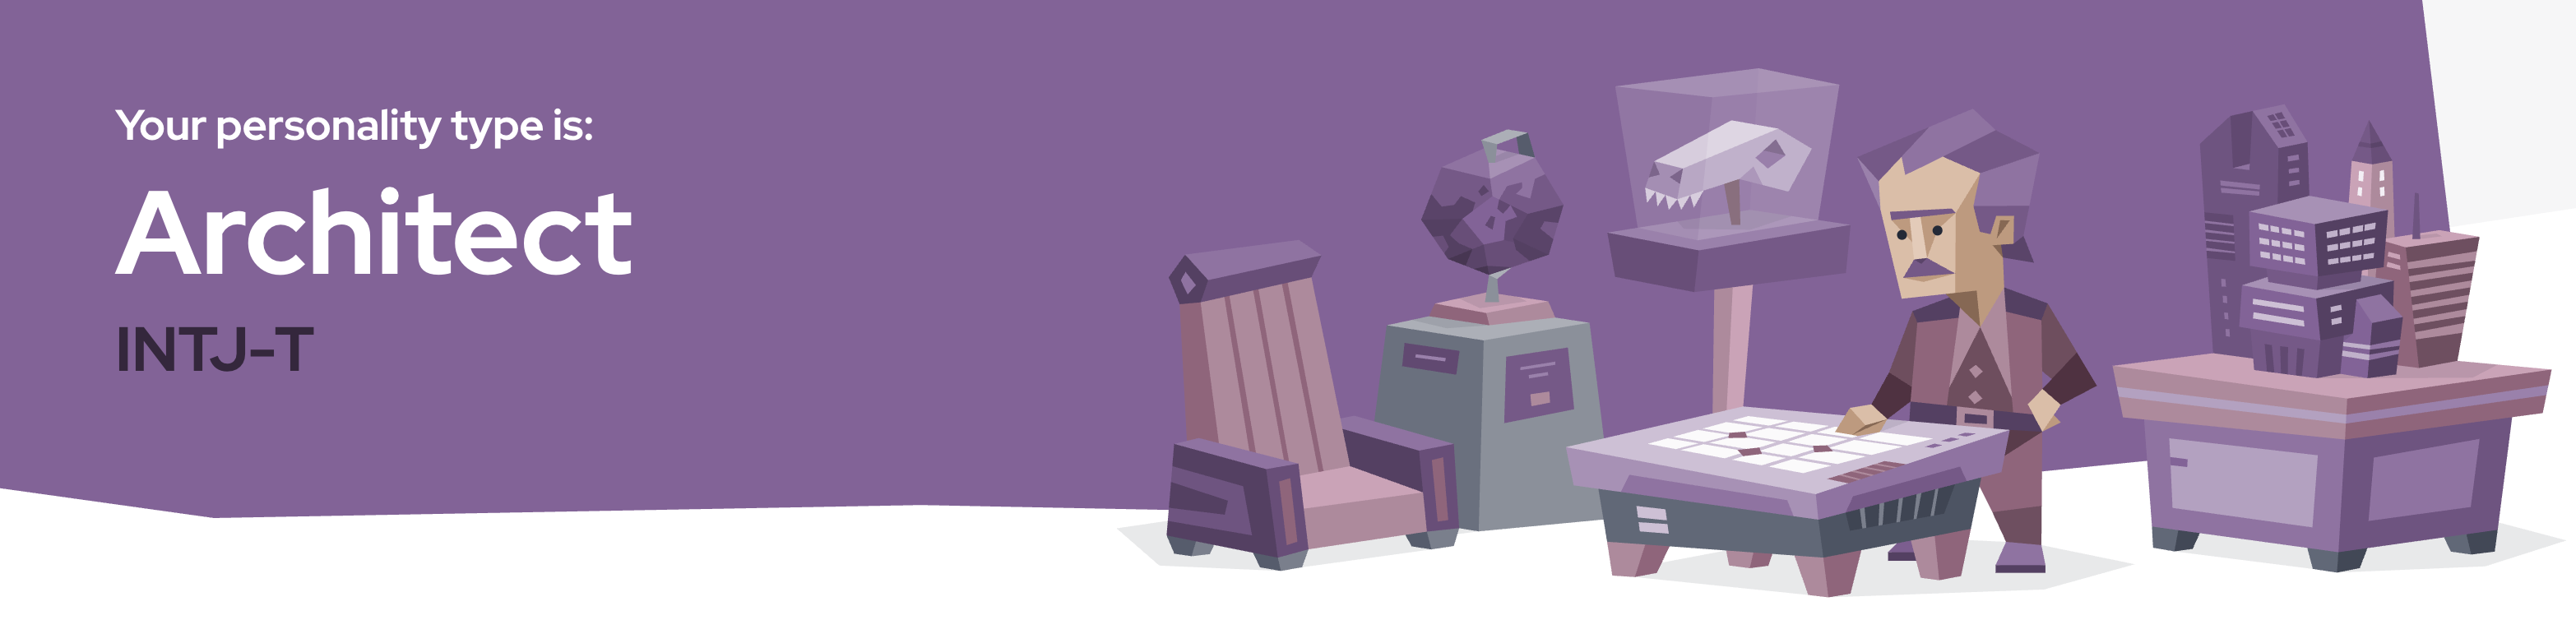

## Future work
While these results are quite good, I think there are a few things that could improve them:
* obtaining more data. It could be interesting to build a system in which users can get predictions of their personality based on their texts and, with users explicit permissions use this data to further improve the model. The model would perform much better if the data was more robust and more balanced.
* If the collected data continues to lack balance, I could try to resample it using some advanced resampling methods (SMOTE etc.). I didn't try it in this experiment because I had relatively few samples.
* Some more advanced models (transformers?) could also perform much better on this data set. I may try it after the Deep Learning course!


## Reference
NERIS Analytics Limited. (n.d.). 16Personalities. Retrieved October 25, 2025, from https://www.16personalities.com/